Nama : Anisa Adelya Ayuputri

Kelas : IF-44-08

NIM : 1301204225

# Library yang digunakan

In [ ]:
# library yang digunakan untuk pre-processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer # untuk meraple data null
from sklearn.decomposition import PCA # untuk redundansi demensi data
import seaborn as sns

# Eksplorasi Data Set

In [ ]:
# membaca data set yang ada di github
df = pd.read_csv("https://github.com/anisa-adelya/case-based-2/blob/b3838d4fabd77899680c89e7e33c743b4334e87a/water-treatment%20(1).data?raw=true",header=None)

In [ ]:
# menampilkan data set
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535,0.32,7.8,192,346,172,68.6,4.0,988,...,950,?,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,D-28/8/91,32922,0.30,7.4,139,367,180,64.4,3.0,1060,...,1136,?,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,D-29/8/91,32190,0.30,7.3,200,545,258,65.1,4.0,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [ ]:
# menampilkan 5 data set pertama
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [ ]:
# menampilkan 5 data terakhir
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
522,D-26/8/91,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535,0.32,7.8,192,346,172,68.6,4.0,988,...,950,?,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,D-28/8/91,32922,0.30,7.4,139,367,180,64.4,3.0,1060,...,1136,?,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,D-29/8/91,32190,0.30,7.3,200,545,258,65.1,4.0,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8
526,D-30/8/91,30488,0.21,7.5,152,300,132,69.7,?,1073,...,1224,?,69.5,?,81.7,76.4,?,81.7,86.4,?


In [ ]:
# menampilkan 3 sample data secara random
df.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
5,D-7/3/90,38572,3.00,7.8,202,372,186,68.8,4.5,1644,...,1764,?,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100
46,D-26/2/90,40879,1.20,7.6,?,435,196,68.4,4.5,1421,...,1354,?,54.5,91.4,?,75.0,?,76.6,88.3,99.6
378,D-5/5/91,36976,0.94,7.9,152,510,136,67.6,3.0,1235,...,1279,48.3,51.4,88.0,78.7,68.1,89.5,87.3,91.9,99.3


In [ ]:
# menyimpan nama nama kolom untuk data set pada array col_name
col_name = ["Days", "Q-E", "ZN-E", "PH-E", "DBO-E", "DQO-E", "SS-E ", "SSV-E", "SED-E", "COND-E", "PH-P", 
            "DBO-P", "SS-P", "SSV-P", "SED-P", "COND-P", "PH-D", "DBO-D", "DQO-D", "SS-D", "SSV-D", 
            "SED-D", "COND-D", "PH-S", "DBO-S", "DQO-S", "SS-S", "SSV-S", "SED-S", "COND-S", "RD-DBO-P",
            "RD-SS-P", "RD-SED-P", "RD-DBO-S", "RD-DQO-S", "RD-DBO-G", "RD-DQO-G", "RD-SS-G", "RD-SED-G"
            ]

In [ ]:
# memberikan nama kolom pada set sesuai dengan nama kolom yang ada pada array col_name
df.columns = col_name
df

,Days,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535,0.32,7.8,192,346,172,68.6,4.0,988,...,950,?,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,D-28/8/91,32922,0.30,7.4,139,367,180,64.4,3.0,1060,...,1136,?,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,D-29/8/91,32190,0.30,7.3,200,545,258,65.1,4.0,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [ ]:
"""
  menampilkan informasi terkait data set yg digunakan, 
  mulai dari menampilkan indeks, tipe data dan columns 
  serta non-null values dan memory yang digunakan
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      527 non-null    object 
 1   Q-E       527 non-null    object 
 2   ZN-E      527 non-null    object 
 3   PH-E      527 non-null    float64
 4   DBO-E     527 non-null    object 
 5   DQO-E     527 non-null    object 
 6   SS-E      527 non-null    object 
 7   SSV-E     527 non-null    object 
 8   SED-E     527 non-null    object 
 9   COND-E    527 non-null    int64  
 10  PH-P      527 non-null    float64
 11  DBO-P     527 non-null    object 
 12  SS-P      527 non-null    int64  
 13  SSV-P     527 non-null    object 
 14  SED-P     527 non-null    object 
 15  COND-P    527 non-null    int64  
 16  PH-D      527 non-null    float64
 17  DBO-D     527 non-null    object 
 18  DQO-D     527 non-null    object 
 19  SS-D      527 non-null    object 
 20  SSV-D     527 non-null    object

In [ ]:
"""
  untuk menampilkan overview dari dataset yang digunakan, seperti menampilkan jumlah, rata2, 
  standar deviasi, nilai min, nilai max, nilai quartil 1,2,3
"""
df.describe()

,PH-E,COND-E,PH-P,SS-P,COND-P,PH-D,COND-D
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,7.810057,1478.620493,7.829981,253.952562,1496.034156,7.811954,1490.569260
std,0.246175,394.898019,0.226925,147.458468,402.588656,0.199594,399.990816
min,6.900000,651.000000,7.300000,104.000000,646.000000,7.100000,85.000000
25%,7.600000,1201.000000,7.700000,184.000000,1217.000000,7.700000,1225.500000
50%,7.800000,1406.000000,7.800000,220.000000,1420.000000,7.800000,1428.000000
75%,8.000000,1672.000000,8.000000,272.000000,1713.500000,7.900000,1701.000000
max,8.700000,3230.000000,8.500000,1692.000000,3170.000000,8.400000,3690.000000


# Preprocessing Data

In [ ]:
""" 
menghilkangkan kolom 'Days' karena kolom ini bertipe string 
dan tidak memiliki pengaruh terhadap hasil dari 
analisis yang dilakukan
"""
df = df.drop(['Days'], axis=1)

In [ ]:
"""
  melihat kolom apa saja yang ada pada data set yang mengandung data ? atau data null
  atau mencari nilai null ada pada kolom apa saja
"""
df.columns[df.isin(['?']).any()]

Index(['Q-E', 'ZN-E', 'DBO-E', 'DQO-E', 'SS-E ', 'SSV-E', 'SED-E', 'DBO-P',
       'SSV-P', 'SED-P', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'PH-S',
       'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P',
       'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G',
       'RD-SS-G', 'RD-SED-G'],
      dtype='object')

In [ ]:
df.isin(['?']).sum()

Q-E         18
ZN-E         3
PH-E         0
DBO-E       23
DQO-E        6
SS-E         1
SSV-E       11
SED-E       25
COND-E       0
PH-P         0
DBO-P       40
SS-P         0
SSV-P       11
SED-P       24
COND-P       0
PH-D         0
DBO-D       28
DQO-D        9
SS-D         2
SSV-D       13
SED-D       25
COND-D       0
PH-S         1
DBO-S       23
DQO-S       18
SS-S         5
SSV-S       17
SED-S       28
COND-S       1
RD-DBO-P    62
RD-SS-P      4
RD-SED-P    27
RD-DBO-S    40
RD-DQO-S    26
RD-DBO-G    36
RD-DQO-G    25
RD-SS-G      8
RD-SED-G    31
dtype: int64

In [ ]:
# menyimpan nama nama kolom yang null pada arr_null
arr_null = ['Q-E', 'ZN-E', 'DBO-E', 'DQO-E', 'SS-E ', 'SSV-E', 'SED-E', 'DBO-P',
       'SSV-P', 'SED-P', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'PH-S',
       'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P',
       'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G',
       'RD-SS-G', 'RD-SED-G']

In [ ]:
"""
  Menghandle missing value (nilai null) dengan cara imputation data
  Dengan data imputation, data yang null akan diisi dengan nilai yang dianggap sebagai rangkuman dari data 
  (yang merepresentasikan data), seperti mean, modus, atau median.
  Di sini kita akan melakukan data imputation dengan nilai mean dari data
"""
df = df.replace('?',np.nan)
imputer = SimpleImputer(strategy = 'mean', missing_values=np.nan)
df[arr_null] = imputer.fit_transform(df[arr_null])

In [ ]:
# menampilkan dataset yang telah dilakukan handling missing value
df

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,44101.0,1.50,7.8,188.714286,407.0,166.0,66.3,4.500000,2110,7.9,...,2000.0,39.085806,58.8,95.5000,83.448049,70.0,89.013646,79.4,87.3,99.60000
1,39024.0,3.00,7.7,188.714286,443.0,214.0,69.2,6.500000,2660,7.7,...,2590.0,39.085806,60.7,94.8000,83.448049,80.8,89.013646,79.5,92.1,100.00000
2,32229.0,5.00,7.6,188.714286,528.0,186.0,69.9,3.400000,1666,7.7,...,1888.0,39.085806,58.2,95.6000,83.448049,52.9,89.013646,75.8,88.7,98.50000
3,35023.0,3.50,7.9,205.000000,588.0,192.0,65.6,4.500000,2430,7.8,...,1840.0,33.100000,64.2,95.3000,87.300000,72.3,90.200000,82.3,89.6,100.00000
4,36924.0,1.50,8.0,242.000000,496.0,176.0,64.8,4.000000,2110,7.9,...,2120.0,39.085806,62.7,95.6000,83.448049,71.0,92.100000,78.2,87.5,99.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,32723.0,0.16,7.7,93.000000,252.0,176.0,56.8,2.300000,894,7.7,...,942.0,39.085806,62.3,93.3000,69.800000,75.9,79.600000,78.6,96.6,99.60000
523,33535.0,0.32,7.8,192.000000,346.0,172.0,68.6,4.000000,988,7.8,...,950.0,39.085806,58.3,97.8000,83.000000,59.1,91.100000,74.6,90.7,100.00000
524,32922.0,0.30,7.4,139.000000,367.0,180.0,64.4,3.000000,1060,7.5,...,1136.0,39.085806,65.0,97.1000,76.200000,66.4,82.000000,77.1,88.9,99.00000
525,32190.0,0.30,7.3,200.000000,545.0,258.0,65.1,4.000000,1260,7.4,...,1326.0,39.800000,65.9,97.1000,81.700000,70.9,89.500000,87.0,89.5,99.80000


In [ ]:
"""
  melakukan pengecekan apakah masih ada missing value pada setiap kolom 
  dengan cara melihat jumlah missing value pada setiap kolom
"""
df.isin(['?']).sum()

Q-E         0
ZN-E        0
PH-E        0
DBO-E       0
DQO-E       0
SS-E        0
SSV-E       0
SED-E       0
COND-E      0
PH-P        0
DBO-P       0
SS-P        0
SSV-P       0
SED-P       0
COND-P      0
PH-D        0
DBO-D       0
DQO-D       0
SS-D        0
SSV-D       0
SED-D       0
COND-D      0
PH-S        0
DBO-S       0
DQO-S       0
SS-S        0
SSV-S       0
SED-S       0
COND-S      0
RD-DBO-P    0
RD-SS-P     0
RD-SED-P    0
RD-DBO-S    0
RD-DQO-S    0
RD-DBO-G    0
RD-DQO-G    0
RD-SS-G     0
RD-SED-G    0
dtype: int64

In [ ]:
# mencari kembali apakah masih ada missing value pada data set
df.columns[df.isin(['?']).any()]

Index([], dtype='object')

In [ ]:
# melakukan pengecekan apakah ada nilai duplikat pada dataset
bool_series = df.duplicated()
print(bool_series)

0      False
1      False
2      False
3      False
4      False
       ...  
522    False
523    False
524    False
525    False
526    False
Length: 527, dtype: bool


In [ ]:
# menampilkan apakah ada kolom yang memiliki nilai duplikat
print(type(bool_series))
bool_series.value_counts()

<class 'pandas.core.series.Series'>


False    527
dtype: int64

In [ ]:
# Menggunakan parameter keep untuk menganggap hanya instance pertama dari baris duplikat yang unik
df = df.drop_duplicates(keep = 'first')

In [ ]:
"""
Menampilkan info data set kembali 
setelah dilakukan handling untung 
kolom yang memiliki duplikat value
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 0 to 526
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       527 non-null    float64
 1   ZN-E      527 non-null    float64
 2   PH-E      527 non-null    float64
 3   DBO-E     527 non-null    float64
 4   DQO-E     527 non-null    float64
 5   SS-E      527 non-null    float64
 6   SSV-E     527 non-null    float64
 7   SED-E     527 non-null    float64
 8   COND-E    527 non-null    int64  
 9   PH-P      527 non-null    float64
 10  DBO-P     527 non-null    float64
 11  SS-P      527 non-null    int64  
 12  SSV-P     527 non-null    float64
 13  SED-P     527 non-null    float64
 14  COND-P    527 non-null    int64  
 15  PH-D      527 non-null    float64
 16  DBO-D     527 non-null    float64
 17  DQO-D     527 non-null    float64
 18  SS-D      527 non-null    float64
 19  SSV-D     527 non-null    float64
 20  SED-D     527 non-null    float6

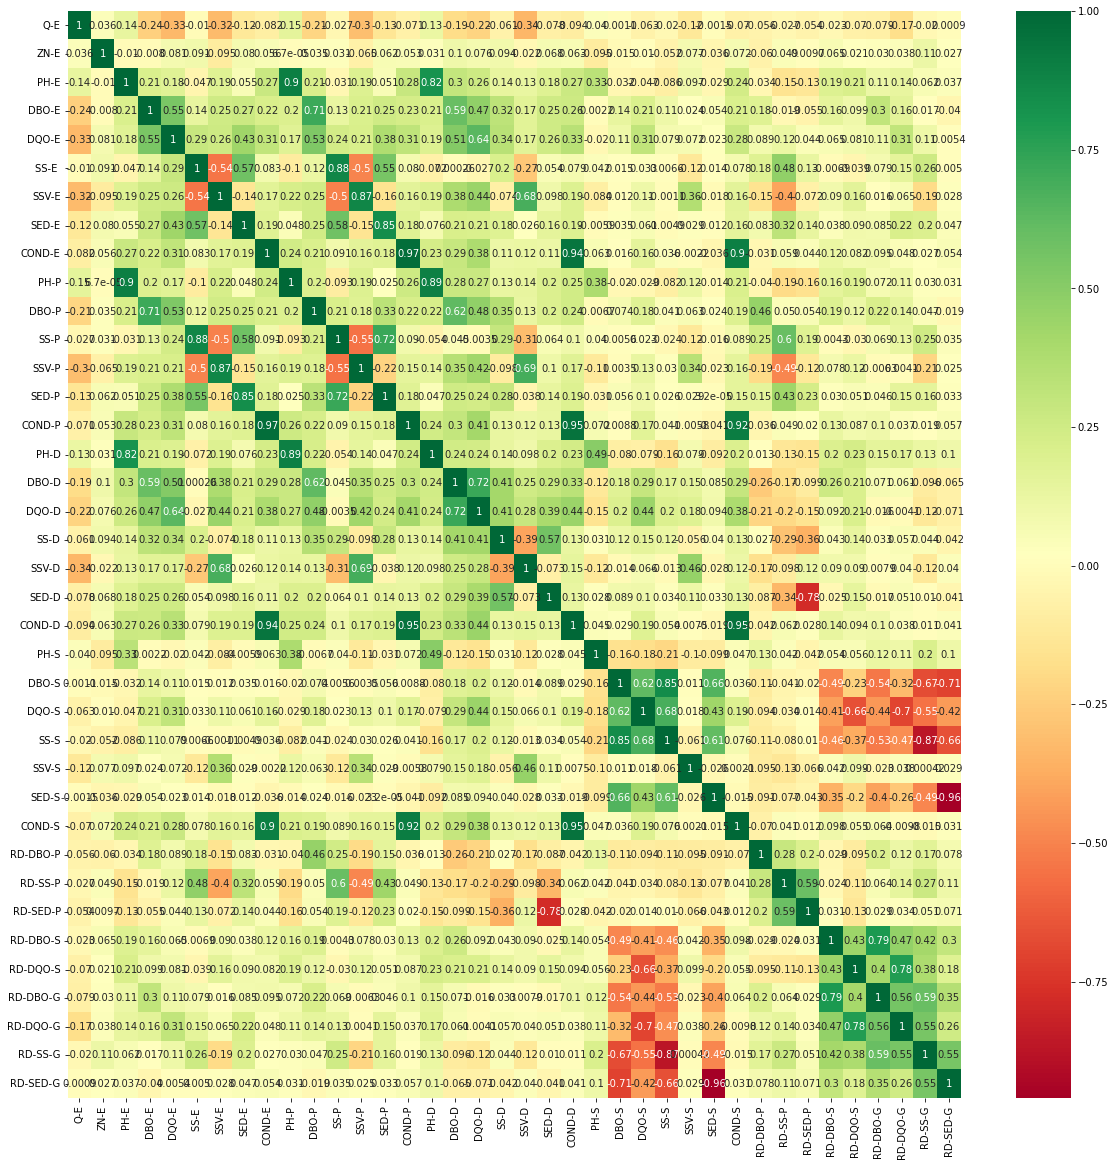

In [ ]:
# menampilkan korelasi dari setiap kolom
corr = df.corr()
top_corr_features = corr.index
plt.figure(figsize=(20,20))
e = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

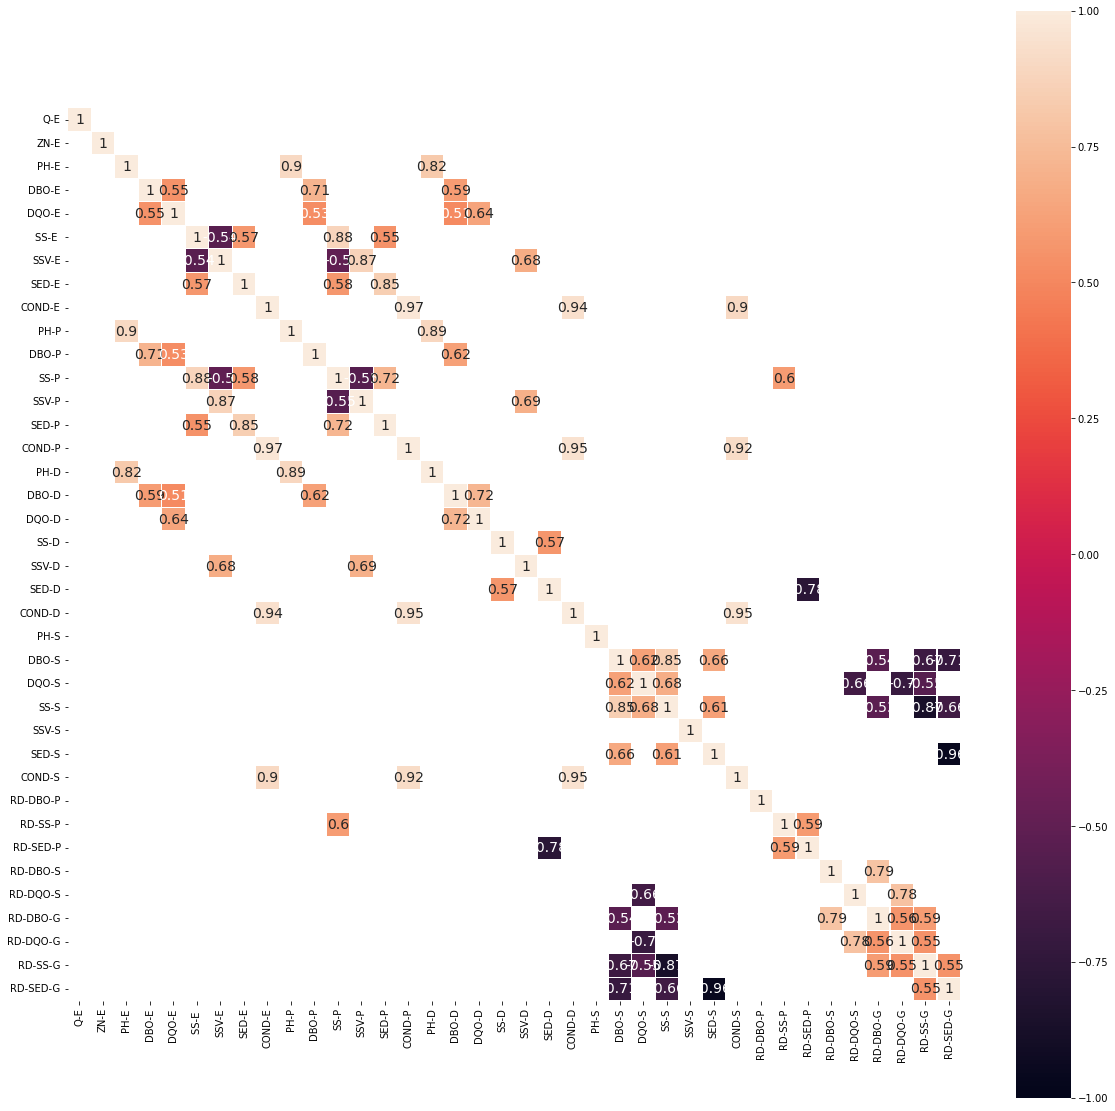

In [ ]:
# menampilkan korelasi tiap kolom yang memiliki nilai korelasi lebih besar sama dengan 0.5 dan lebih kecil sama dengan -0.5
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr[(corr>=0.5) | (corr <= -0.5)],vmax=1.0, vmin=-1.0,linewidths=0.1,annot=True,
            annot_kws={"size":14},square=True)

In [ ]:
col_num = list(df.columns)

In [ ]:
# menghitung presentase nilai outlier untuk semua atribut
def hitungOutliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

for i in col_num:
  outliers = hitungOutliers(df[i])
  percentage = len(outliers)/len(df[i])*100
  print(i)
  print("number of outliers: " + str(len(outliers)))
  print("max outlier value: " + str(outliers.max()))
  print("min outlier value: " + str(outliers.min()))
  print("Outliers percentage: "+ str(float(f'{percentage:.2f}'))+"%")
  print()

Q-E
number of outliers: 12
max outlier value: 60081.0
min outlier value: 10050.0
Outliers percentage: 2.28%

ZN-E
number of outliers: 33
max outlier value: 33.5
min outlier value: 6.2
Outliers percentage: 6.26%

PH-E
number of outliers: 2
max outlier value: 8.7
min outlier value: 6.9
Outliers percentage: 0.38%

DBO-E
number of outliers: 16
max outlier value: 438.0
min outlier value: 31.0
Outliers percentage: 3.04%

DQO-E
number of outliers: 12
max outlier value: 941.0
min outlier value: 81.0
Outliers percentage: 2.28%

SS-E 
number of outliers: 39
max outlier value: 2008.0
min outlier value: 352.0
Outliers percentage: 7.4%

SSV-E
number of outliers: 24
max outlier value: 34.3
min outlier value: 13.2
Outliers percentage: 4.55%

SED-E
number of outliers: 11
max outlier value: 36.0
min outlier value: 9.0
Outliers percentage: 2.09%

COND-E
number of outliers: 15
max outlier value: 3230
min outlier value: 2390
Outliers percentage: 2.85%

PH-P
number of outliers: 1
max outlier value: 8.5
min

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

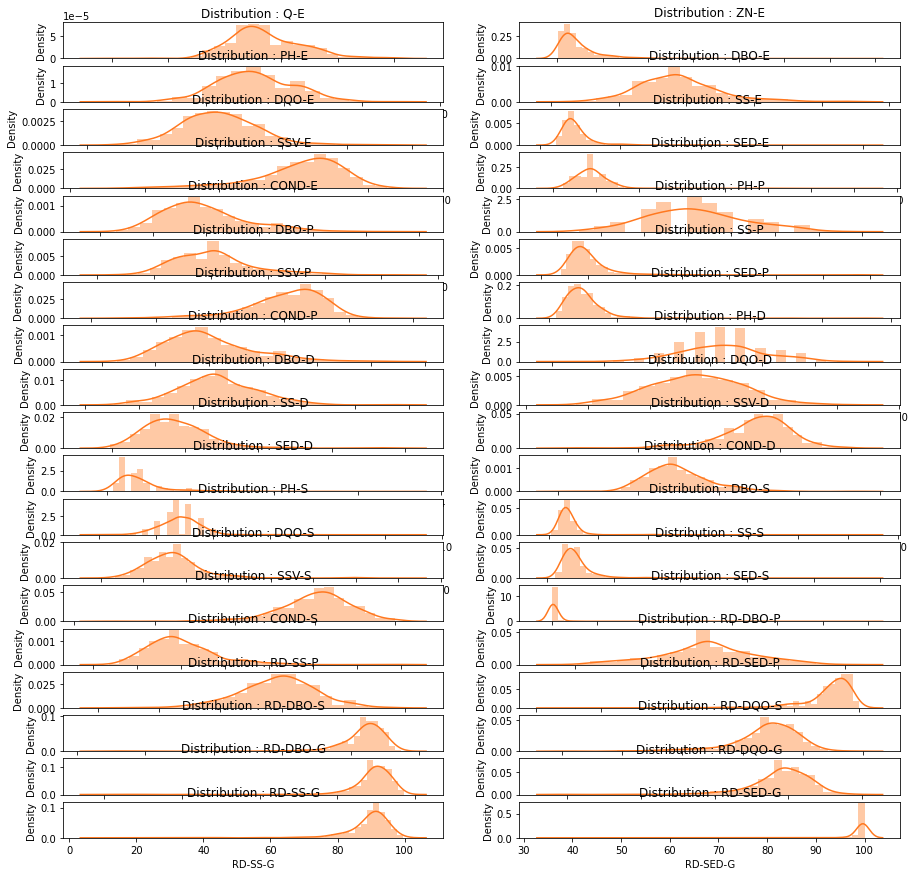

In [ ]:
# melihat distribusi atribut
colors = ['#FF781F','#2D2926']
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(col_num)):
    plt.subplot(19,2,i+1)
    sns.distplot(df[col_num[i]],color = colors[0])
    title = 'Distribution : ' + col_num[i]
    plt.title(title)
plt.show()

# Proses K-Means

Langkah - langkak proses K-Means yang digunakan :
1. Data scaling
2. Inisiasi nilai centroid secara random
3. Memberi label untuk semua titik point
4. Merubah nilai centroid
5. Mengulangi langkah 3 dan 4 sampai titik centroid tidak berubah


In [ ]:
# kolom kolom yang digunakan untuk membuat clustering
features = ["PH-S", "DBO-S", "DQO-S", "SS-S", "SSV-S", "SED-S", "COND-S"]

In [ ]:
data = df[features].copy()

In [ ]:
data

,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S
0,7.3,19.988095,84.0,21.0,81.0,0.020000,2000.0
1,7.5,19.988095,91.0,17.0,94.1,0.000000,2590.0
2,7.6,19.988095,128.0,21.0,81.0,0.050000,1888.0
3,7.6,20.000000,104.0,20.0,96.7,0.000000,1840.0
4,7.6,19.000000,108.0,22.0,65.9,0.020000,2120.0
...,...,...,...,...,...,...,...
522,7.9,19.000000,54.0,6.0,100.0,0.010000,942.0
523,7.9,17.000000,88.0,16.0,90.0,0.000000,950.0
524,7.7,25.000000,84.0,20.0,84.0,0.020000,1136.0
525,7.7,21.000000,71.0,27.0,71.1,0.010000,1326.0


# Data Scaling

In [ ]:
# min max scaling
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [ ]:
data.describe()

,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,3.366286,1.482312,3.066429,1.629831,7.476919,1.095334,3.236412
std,0.623924,0.488338,1.012262,0.630744,1.145065,0.492425,1.067596
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.312303,2.478006,1.310345,6.841102,1.000000,2.520661
50%,3.333333,1.425868,3.005865,1.504310,7.533898,1.051429,3.066116
75%,3.666667,1.539432,3.401760,1.698276,8.182203,1.051429,3.778237
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
data.head()

,PH-S,DBO-S,DQO-S,SS-S,SSV-S,SED-S,COND-S
0,2.000000,1.482312,2.979472,1.581897,7.584746,1.051429,4.628099
1,2.666667,1.482312,3.164223,1.426724,9.250000,1.000000,6.253444
2,3.000000,1.482312,4.140762,1.581897,7.584746,1.128571,4.319559
3,3.000000,1.482650,3.507331,1.543103,9.580508,1.000000,4.187328
4,3.000000,1.454259,3.612903,1.620690,5.665254,1.051429,4.958678


# Inisiasi Random Centroid

In [ ]:
# initial random centroid
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [ ]:
centroids = random_centroids(data, 5)

In [ ]:
centroids

,0,1,2,3,4
PH-S,4.000000,3.666667,3.666667,3.333333,3.000000
DBO-S,1.369085,1.340694,1.567823,1.170347,1.454259
DQO-S,2.530792,2.319648,4.114370,2.346041,3.066429
SS-S,1.310345,1.659483,2.047414,1.620690,1.387931
SSV-S,6.364407,7.000000,7.953390,7.457627,8.500000
SED-S,1.051429,1.128571,1.025714,1.128571,1.051429
COND-S,4.297521,3.443526,3.542700,3.044077,2.903581


# Melabeli setiap data point

In [ ]:
# distance formula
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

# Melakukan perubahan centroid

In [ ]:
# memberi label pada data points
labels = get_labels(data, centroids)

In [ ]:
# menacari nilai centroid baru 
def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [ ]:
# membuat plot dari cluster yang terbentuk
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

# Main

In [ ]:
# library ini digunakan untuk mengupdate display plot yang ditampilkan pada setiap iterasi yang dilakukan
from IPython.display import clear_output

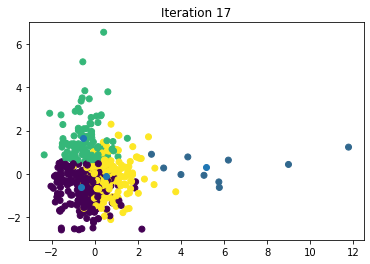

In [ ]:
max_iteration = 100
k = 4 #banyaknya cluster

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iteration and not centroids.equals(old_centroids):
  old_centroids = centroids
  labels = get_labels(data, centroids)
  centroids = new_centroids(data, labels, k)
  plot_clusters(data, labels, centroids, iteration)
  iteration+=1

# Evaluasi

In [ ]:
from sklearn.cluster import KMeans 

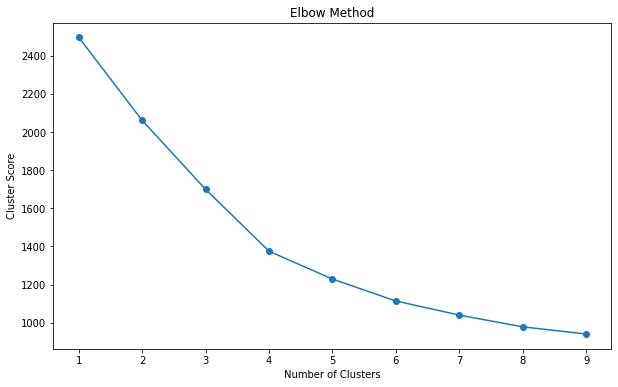

In [ ]:
cluster_score = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(data)
    cluster_score.append(kmeans.inertia_) 
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 10), cluster_score, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Score')
plt.show()

In [ ]:
cluster_score

[2495.178309581649,
 2060.275555265481,
 1699.1881511363504,
 1374.8726971750893,
 1229.2818482981997,
 1114.260976030462,
 1040.5158969696224,
 978.8025101023254,
 941.4659713802757]

In [ ]:
kmeans = KMeans(5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
pd.DataFrame(centroids, columns=features).T

,0,1,2,3,4
PH-S,2.974359,3.527273,3.479905,2.666667,3.293757
DBO-S,1.897580,1.453985,1.395446,7.615142,1.426579
DQO-S,5.197834,3.225520,2.763759,9.419355,2.765772
SS-S,2.449271,1.633033,1.520268,7.924569,1.504505
SSV-S,7.534719,7.429677,6.235034,7.044492,8.238251
SED-S,1.249971,1.052626,1.060592,8.071429,1.051135
COND-S,3.106590,4.732557,2.741750,3.084022,2.855727
